### This code is to parse and analyse the log file in the thermalization

In [3]:
import re
import os
import pandas as pd
    
def parse_lammps_log(file_path):
    """Parses the LAMMPS log file to extract relevant data."""
    
    # Initialize storage for parsed data
    parsed_data = []

    with open(file_path, 'r') as file:
        i = 1
        for line in file:
            # Strip leading and trailing whitespace
            line = line.strip()
            # Parse lines with the specified format
            match = re.match(r'^(\d+)\s+([-+]?\d+\.\d+)\s+([-+]?\d+\.\d+)\s+([-+]?\d+\.\d+)\s+([-+]?\d+\.\d+)\s+([-+]?\d+\.\d+)\s+([-+]?\d+\.\d+)$', line)
            if match:
                step, total_energy, potential_energy, kinetic_energy, temperature, pressure, volume = match.groups()
                # Convert to output format
                parsed_data.append({
                    "step"            : int(i),
                    "temperature"     : float(temperature),
                    "total_energy"    : float(total_energy),
                    "potential_energy": float(potential_energy),
                    "kinetic_energy"  : float(kinetic_energy),
                    "pressure"        : float(pressure),
                    "volume"          : float(volume)
                })
                i += 1
        df = pd.DataFrame(parsed_data)
    return df

# Main script
if __name__ == "__main__":
    
    # Define the file paths for input and output
    #folder_PATH     = 'HOPG_O_300k_20ps_FPv0_30t_20fs_tconst/'
    folder_PATH     = 'HOPG_O_300k_FPv0_30t_100ps_from_20fs_tconst_with_restart'
    input_log_file  = f'{folder_PATH}/log.lammps'
    output_PATH     = f'{folder_PATH}/Figures'
    
    # Check if the directory exists, if not, create it
    if not os.path.exists(output_PATH):
        os.makedirs(output_PATH)
        print(f"Directory {output_PATH} created.")
    
    # Parse the input file
    Thermalization_data = parse_lammps_log(input_log_file)
    


### Code to plot  temperatures during the thermalization

Temperature plot saved to: HOPG_O_300k_FPv0_30t_100ps_from_20fs_tconst_with_restart/Figures/temperature_vs_step.png


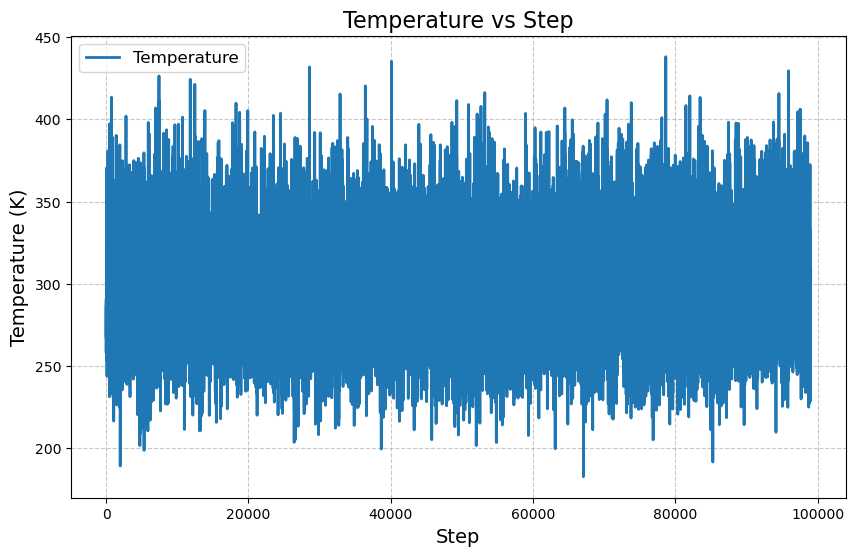

In [4]:
import matplotlib.pyplot as plt

def plot_temperatures(parsed_data, output_path):
    """Plots temperatures vs steps and saves the plot."""

    plt.figure(figsize=(10, 6))
    plt.plot(parsed_data['step'], parsed_data['temperature'], label="Temperature", linewidth=2)
    plt.xlabel("Step", fontsize=14)
    plt.ylabel("Temperature (K)", fontsize=14)
    plt.title("Temperature vs Step", fontsize=16)
    plt.grid(True, linestyle="--", alpha=0.7) 
    plt.legend(fontsize=12)

    # Save the plot
    plot_file = os.path.join(output_path, "temperature_vs_step.png")
    plt.savefig(plot_file, dpi=300, bbox_inches="tight")
    #plt.close()
    print(f"Temperature plot saved to: {plot_file}")

#print(Thermalization_data['step'])

# Plot and save the temperature vs step graph
plot_temperatures(Thermalization_data, output_PATH)